In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Step 1: Calculate the p-value based on test type and sample statistic
def calculate_p_value(test_type, sample_statistic):
    """
    Calculate the p-value for a given test type and sample statistic.
    
    Parameters:
        test_type (str): The type of test ('left-tailed' or 'right-tailed').
        sample_statistic (float): The observed test statistic.
    
    Returns:
        float: The calculated p-value.
    """
    if test_type == 'left-tailed':
        p_value = norm.cdf(sample_statistic)
    else:  # right-tailed
        p_value = 1 - norm.cdf(sample_statistic)
    
    return p_value

In [3]:
# Step 2: Plot the normal distribution and p-value region
def plot_p_value(ax, test_type, sample_statistic, p_value):
    """
    Plot the normal distribution with shaded p-value region for the given test type.
    
    Parameters:
        ax (matplotlib.axes._axes.Axes): Axes object to plot on.
        test_type (str): The type of test ('left-tailed' or 'right-tailed').
        sample_statistic (float): The observed test statistic.
        p_value (float): The calculated p-value.
    """
    # X values for the normal distribution
    x = np.linspace(-4, 4, 1000)
    
    # Y values for the normal distribution
    y = norm.pdf(x)

    # Plot the normal distribution
    ax.plot(x, y, color='green')

    # Shade the area based on the test type
    if test_type == 'left-tailed':
        p_value_area = x[x <= sample_statistic]
    else:  # right-tailed
        p_value_area = x[x >= sample_statistic]

    # Fill the shaded area representing the p-value
    ax.fill_between(p_value_area, norm.pdf(p_value_area), color='purple' if test_type == 'left-tailed' else 'blue', alpha=0.5)

    # Add a vertical line and text for the sample statistic
    ax.axvline(sample_statistic, color='black', linestyle='dashed', linewidth=1)
    ax.text(sample_statistic, 0.02, f'Statistic\n{sample_statistic:.2f}', horizontalalignment='center', color='black')
    
    # Annotate the p-value on the plot
    ax.annotate('p-value', xy=(sample_statistic, 0.02), xytext=(sample_statistic - 1 if test_type == 'left-tailed' else sample_statistic + 1, 0.1),
                arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', color='black')

    # Set title and labels
    ax.set_title(f"{test_type.capitalize()} Test")
    ax.set_xlabel('Sample Statistic')
    ax.set_ylabel('Density')

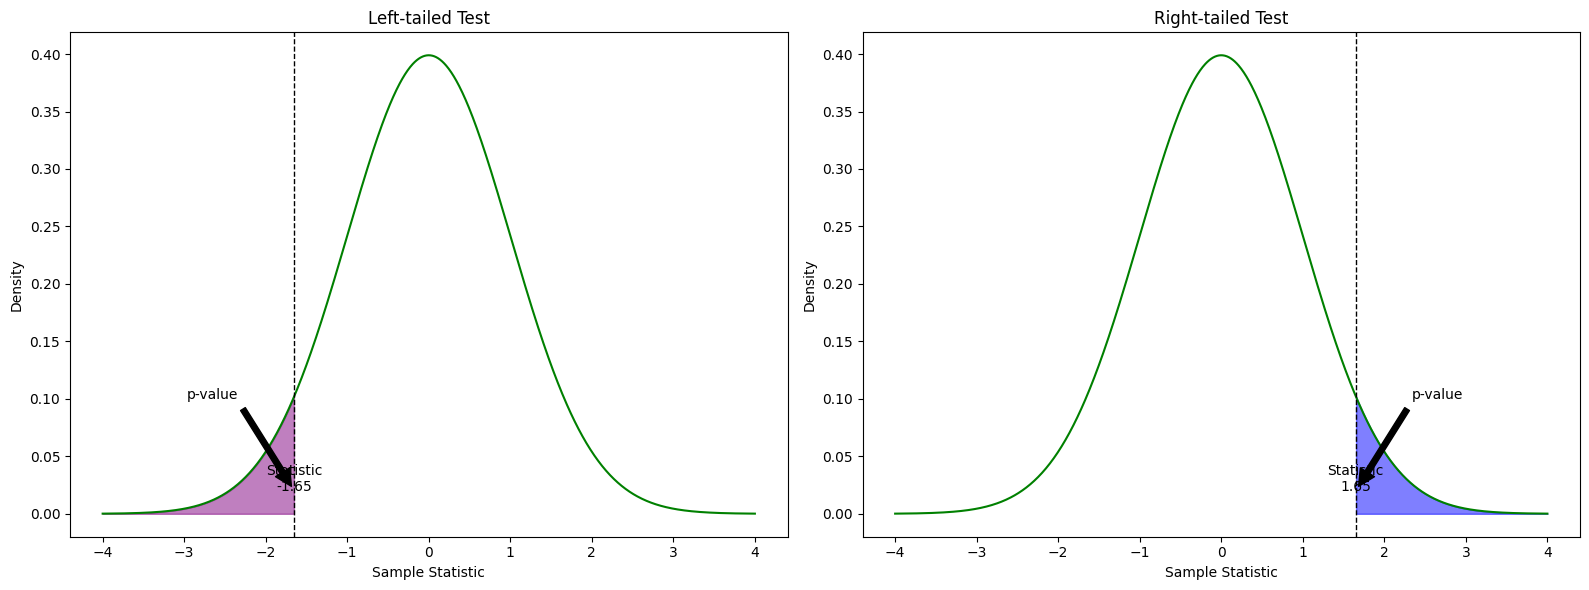

In [4]:
# Sample statistics for illustration
left_sample_statistic = -1.65  # Left-tailed test
right_sample_statistic = 1.65  # Right-tailed test

# Step 1: Calculate p-values for both tests
left_p_value = calculate_p_value('left-tailed', left_sample_statistic)
right_p_value = calculate_p_value('right-tailed', right_sample_statistic)

# Step 2: Create figure and axes for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Step 3: Plot the p-values for both tests
plot_p_value(ax1, 'left-tailed', left_sample_statistic, left_p_value)
plot_p_value(ax2, 'right-tailed', right_sample_statistic, right_p_value)

# Display the plot
plt.tight_layout()
plt.show()

In [5]:
# Print the calculated p-values
print(f"Calculated p-value for the left-tailed test: {left_p_value:.4f}")
print(f"Calculated p-value for the right-tailed test: {right_p_value:.4f}")

Calculated p-value for the left-tailed test: 0.0495
Calculated p-value for the right-tailed test: 0.0495
